# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=5_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
if mortality:
    perusmalli_start='best/v2_malli_base_dev'
    perusmalli='best/v2_malli_base_dev'
    perusresults='results/v2_malli_base_dev_stoch'
    prefmalli='best/v2_malli_perus_prefnoise'
    prefresults='results/v2_perus_results_prefnoise'
else:
    perusmalli_start='best/v2_malli_base_nomort'
    perusmalli='best/v2_malli_base_nomort'
    perusresults='results/v2_malli_base_nomort'
    prefmalli='best/v2_malli_perus_prefnoise_nomort'
    prefresults='results/v2_perus_results_prefnoise_nomort'
    
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=False,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
simulate
simulating  best/v2_malli_base_nomort
predicting...




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Widget Javascript not detected.  It may not be installed or enabled properly.


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 100000
Ave reward 226.33922783306338


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


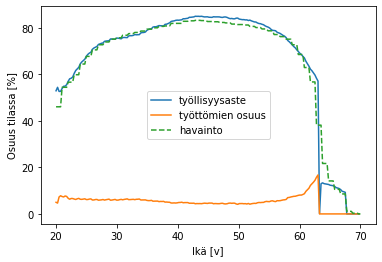

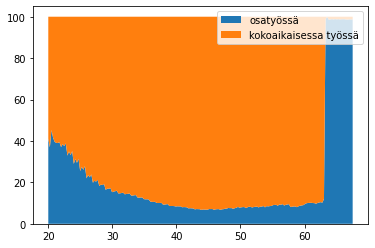

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


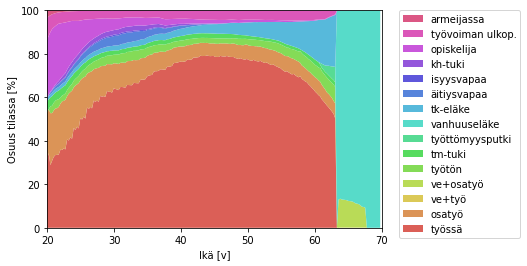

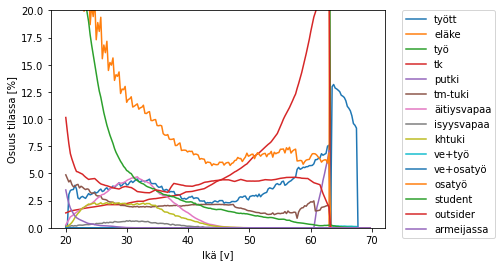

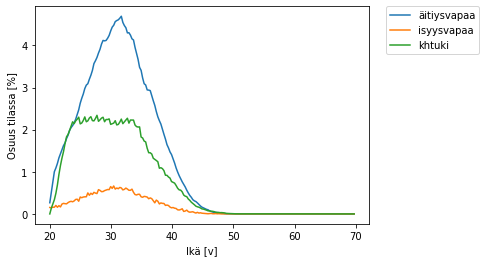

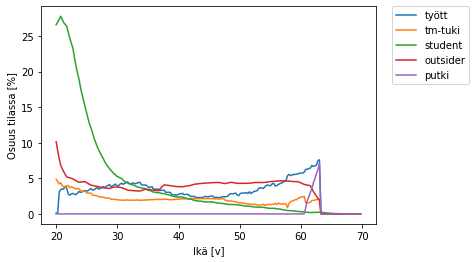

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


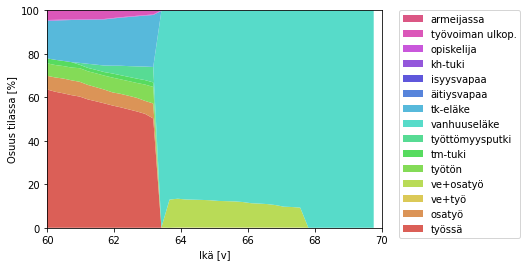

Rahavirrat skaalattuna väestötasolle
+------------------+-----------------------+----------------------+----------------------+
|                  |                   e/v |              toteuma |                  ero |
|------------------+-----------------------+----------------------+----------------------|
| palkkatulo       |  93,631,208,773.26    | 89,134,200,000.00    |  4,497,008,773.26    |
| etuusmeno        |  44,083,567,871.27    | 36,945,147,749.00    |  7,138,420,122.27    |
| verot+maksut     |  34,659,051,396.52    | 30,763,000,000.00    |  3,896,051,396.52    |
| muut tulot       |   9,424,516,474.75    |  6,182,147,749.00    |  3,242,368,725.75    |
| valtionvero      |   3,624,605,817.60    |  5,542,000,000.00    | -1,917,394,182.40    |
| kunnallisvero    |  20,800,761,525.74    | 18,991,000,000.00    |  1,809,761,525.74    |
| ptel             |   6,552,625,628.48    |  5,560,000,000.00    |    992,625,628.48    |
| tyotvakmaksu     |   1,778,992,966.69    |  1,693,5

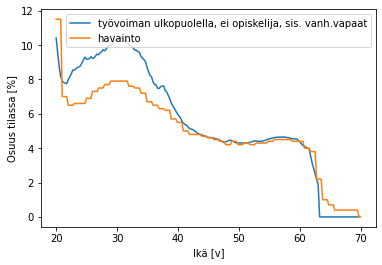

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.62 |      0.27 |       0.10 |      0.01 |        0.00 |
| 30-39 |     0.54 |      0.28 |       0.15 |      0.03 |        0.00 |
| 40-49 |     0.62 |      0.24 |       0.12 |      0.02 |        0.00 |
| 50-59 |     0.48 |      0.26 |       0.18 |      0.07 |        0.00 |
| 60-65 |     0.54 |      0.11 |       0.10 |      0.09 |        0.16 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.60 |      0.17 |       0.20 |      0.03 |        0.00 |
| 30-39 |     0.55 |      0.18 |       0.18 |      0.09 |        0.00 |
| 40-49 |     0.69 |      0.15 |       0.11 |      0.05 |        0.00 |
| 50-59 |     0.58 |      0.09 |       0.15 |      0.18 |        0.00 |
| 60-65 |     0.33 |      0.14 |       0.17 |      0.27 |        0.09 |
+-------+----------+-----------+------------+-----------+-------------+


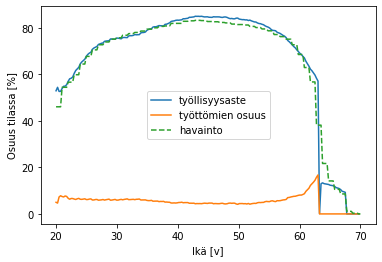

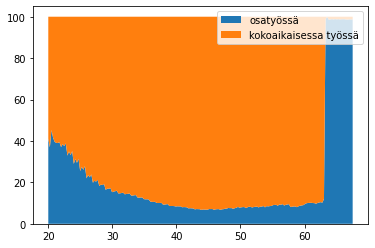

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


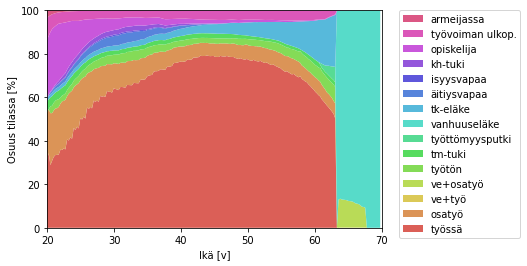

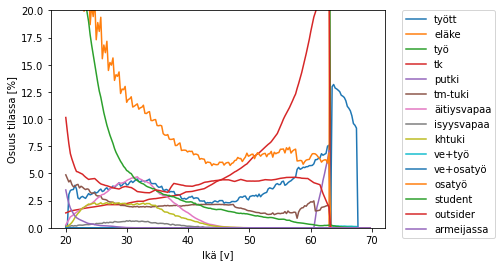

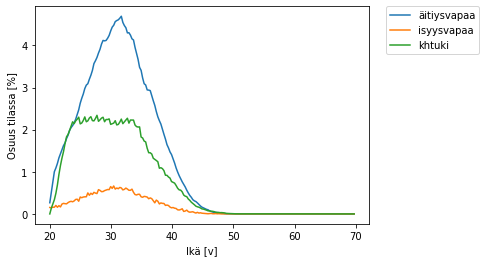

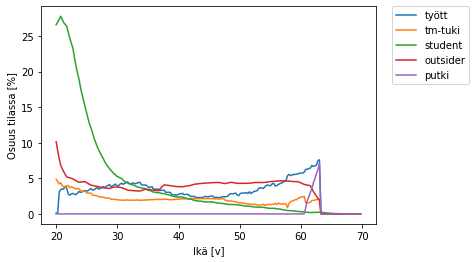

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


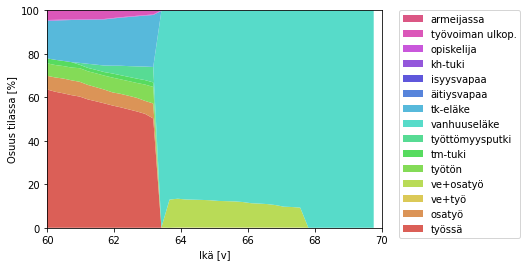

Lisäpäivillä on 7357 henkilöä


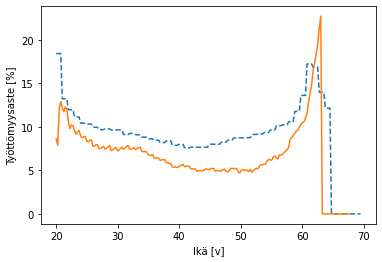

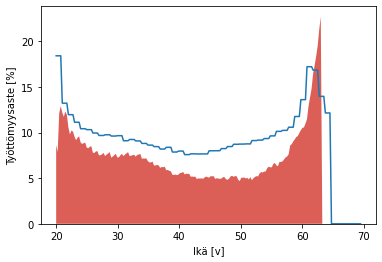

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


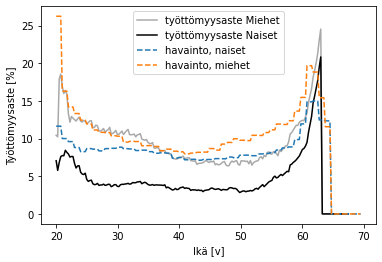

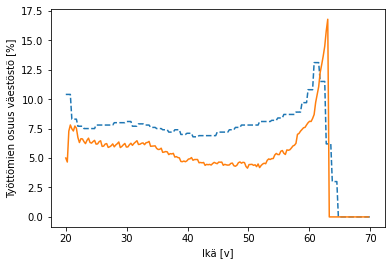

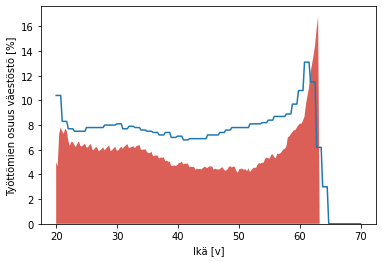

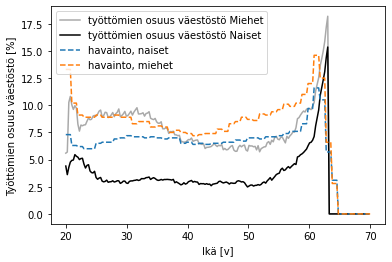

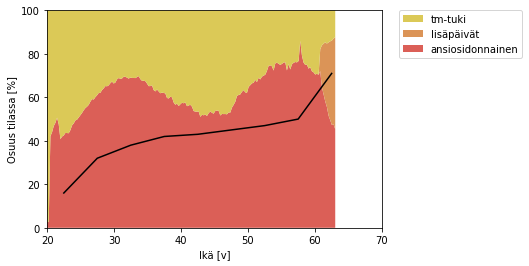

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


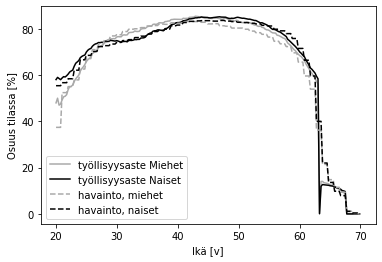

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


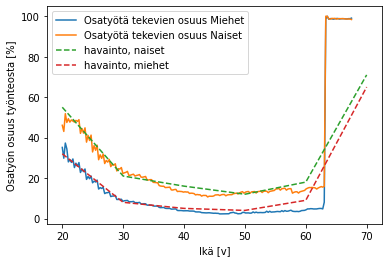

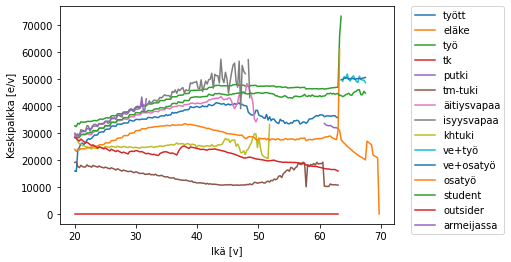

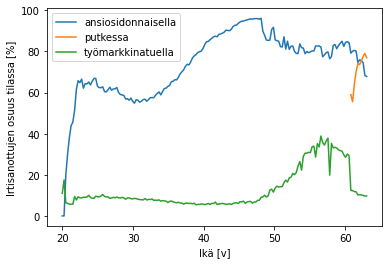

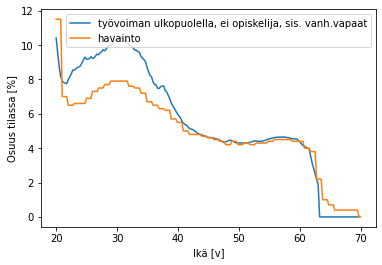

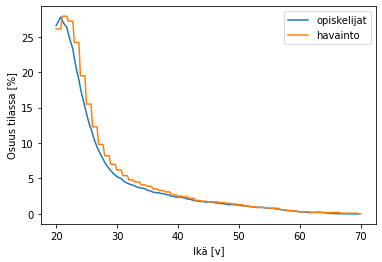

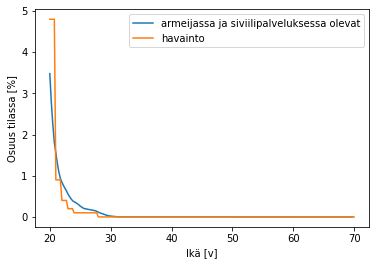

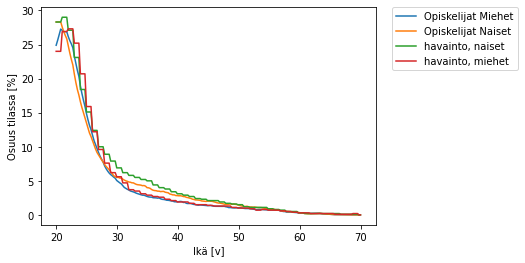

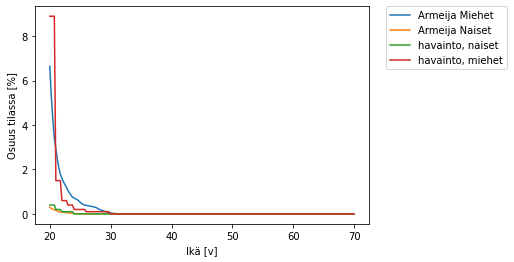

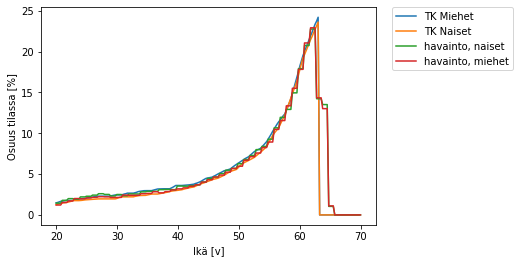

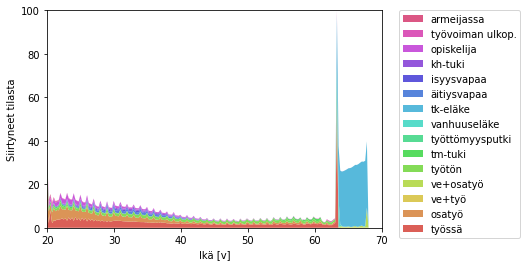

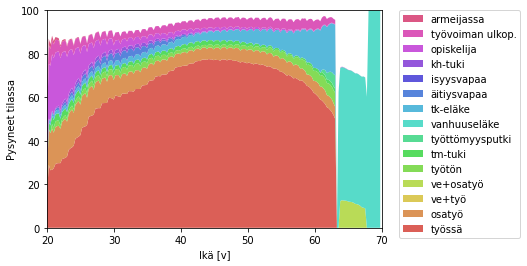

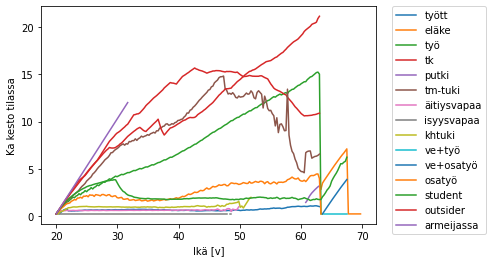

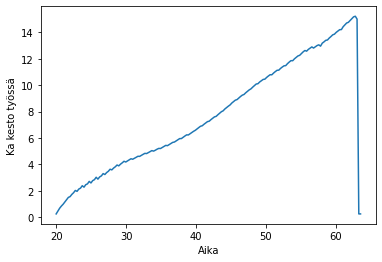

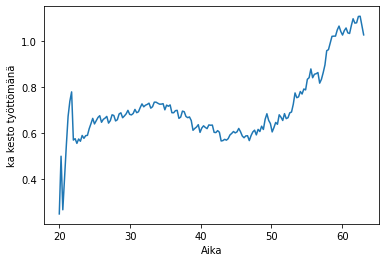

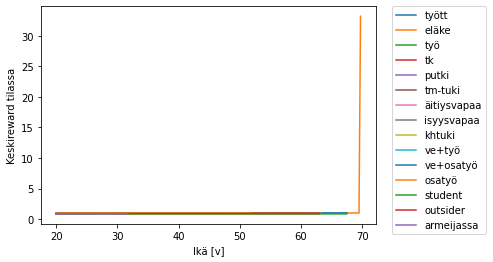

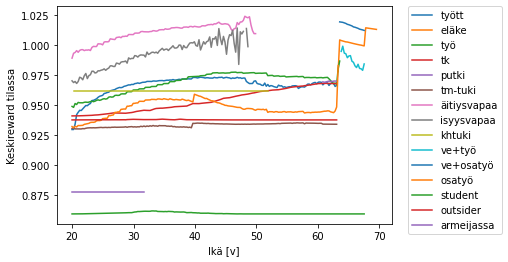

No handles with labels found to put in legend.


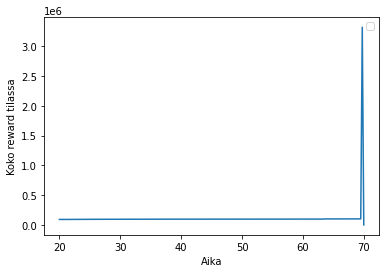

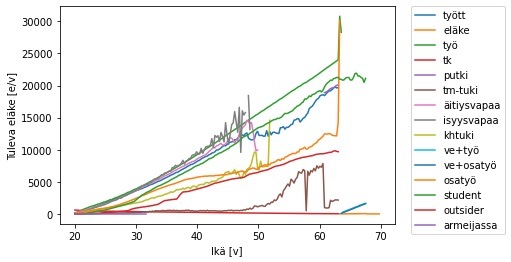

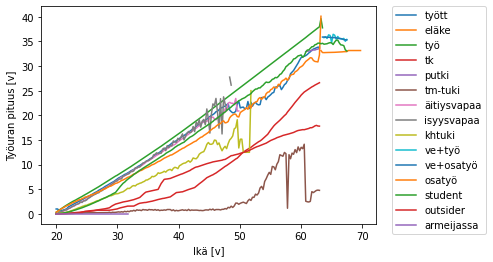

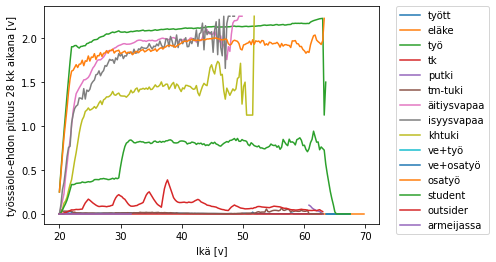

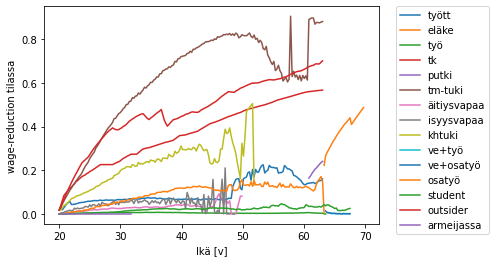

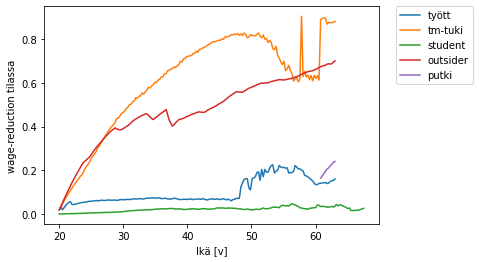

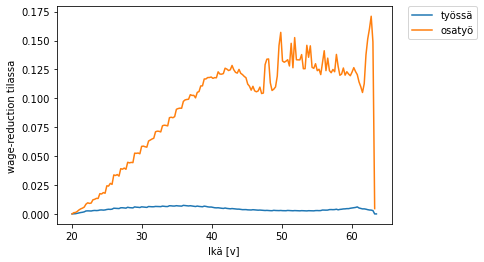

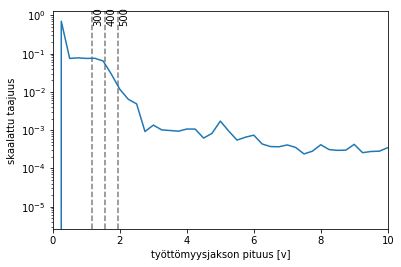

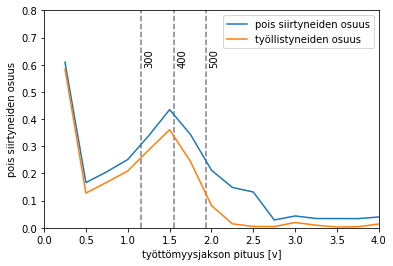

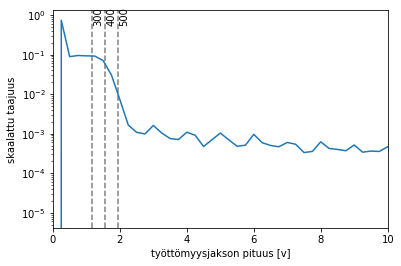

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


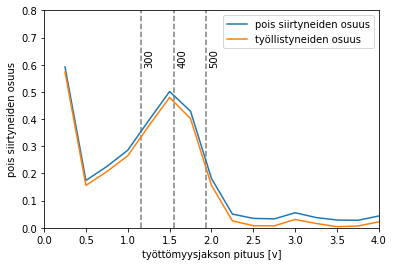

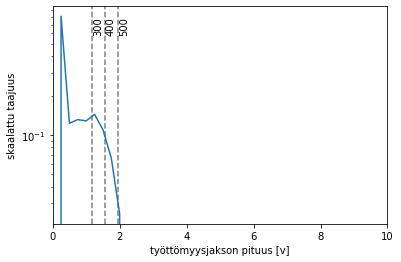

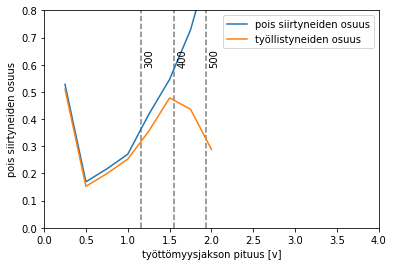

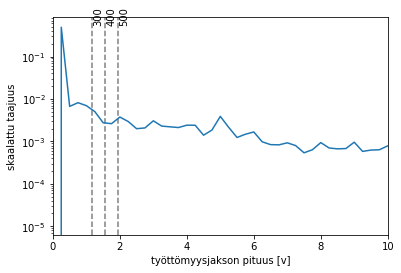

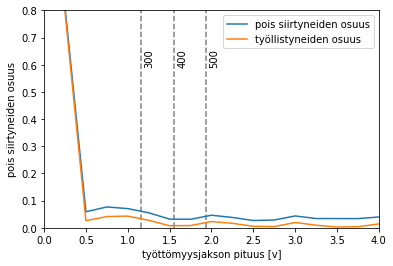

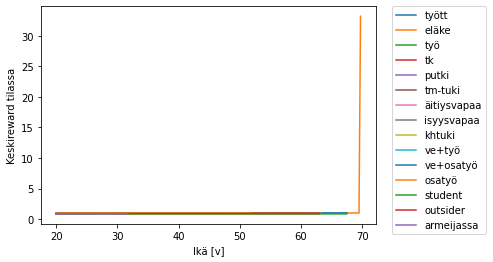

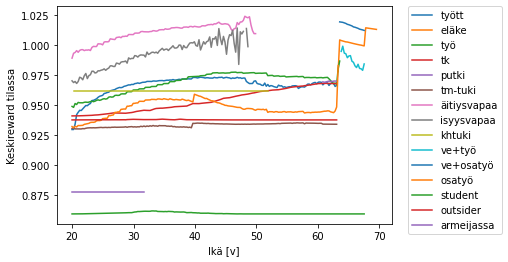

No handles with labels found to put in legend.


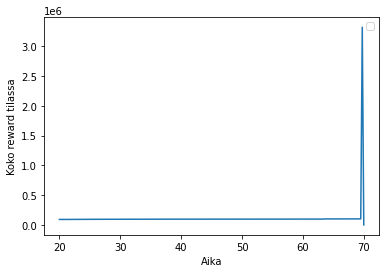

In [6]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.render(load=perusresults,figname='v2_')

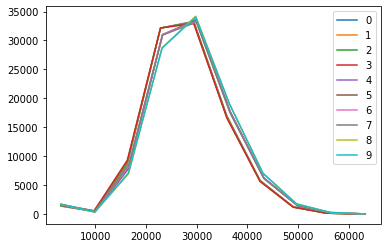

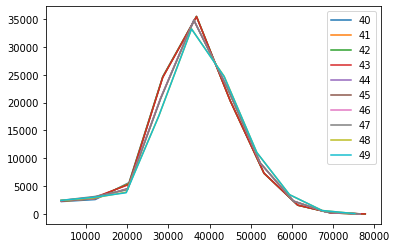

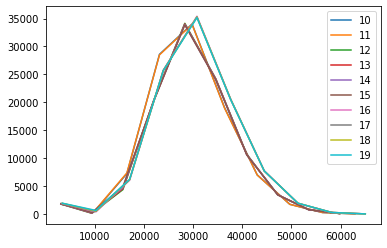

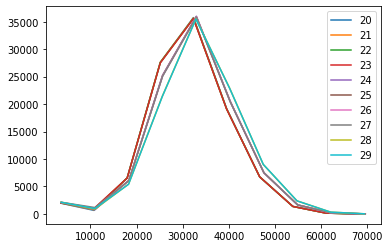

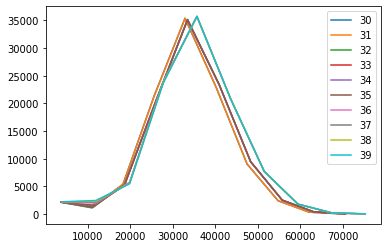

In [7]:
for t in set([0,10,20,30,40]):
    cc1.episodestats.plot_saldist(t)

    


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 100000


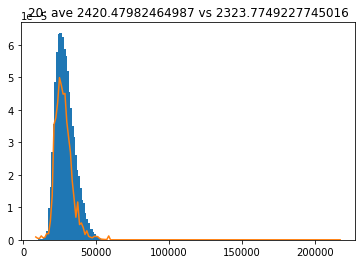

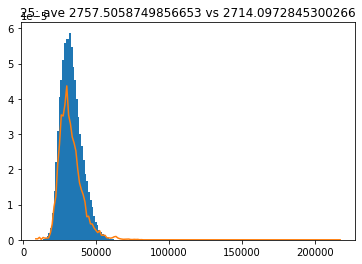

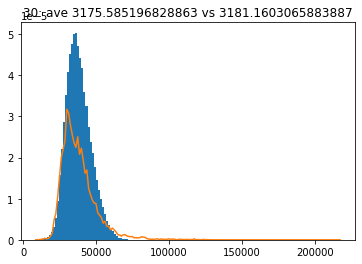

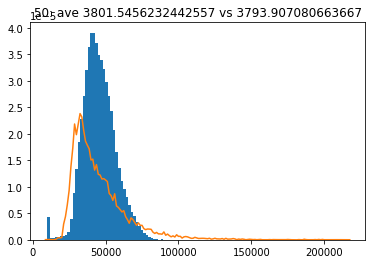

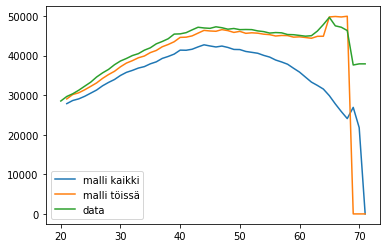

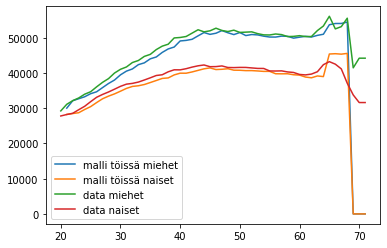

In [8]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.test_salaries()

In [9]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.env.unit_test_code_decode()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
unempwage_basis: 64820.4057288235 vs 64820.405728823505
pension: 5212.336895135161 vs 5212.336895135159
old_wage: 26915.902462636677 vs 26915.90246263668
old_wage: 7950.62289038384 vs 7950.622890383842
pension: 6195.223950374418 vs 6195.22395037442
old_wage: 278.81186127191705 vs 278.81186127191904
old_wage: 6052.314213704779 vs 6052.314213704776
pension: 60150.04210062074 vs 60150.04210062075
tyohist: 0.2798439589850177 vs 0.27984395898501724
next_wage: 7215.711768341606 vs 7215.711768341607
paid_pension: 8285.49896939589 vs 8285.498969395889
next_wage: 1205.8437384501453 vs 1205.843

# IRR

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 100000
aggregate irr 2.596440643180696
Nans 1980 out of 100000


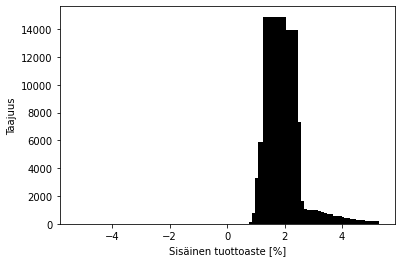

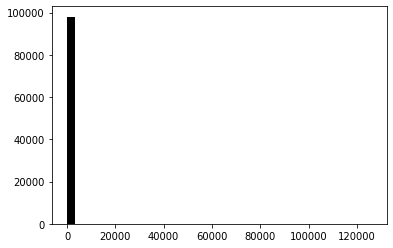

Keskimääräinen irr 5.766 %
Mediaani irr 2.026 %
Osuus irr<0 [0.] %:lla
Osuus irr<-50 [0.] %:lla
Osuus eläke ei maksussa 0.0 %:lla
Osuus eläke ei maksussa, ei kuollut 0.0 %:lla
Osuus kuolleet 0.0 %:lla


In [10]:
if True:
    cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
    cc1.load_sim(perusresults)
    cc1.episodestats.plot_irr(figname='kela')

In [11]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.env.test_comp_npv()

# test

In [12]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.get_vanhempainvapaat()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 100000
(202, 1)


(array([[0.00000000e+00],
        [8.13818965e-03],
        [1.53987314e-02],
        [1.74532254e-02],
        [1.90290023e-02],
        [1.92683608e-02],
        [2.08042446e-02],
        [2.10037101e-02],
        [1.93481470e-02],
        [1.76526908e-02],
        [1.65955240e-02],
        [1.62963258e-02],
        [1.45011370e-02],
        [1.30649858e-02],
        [1.16088882e-02],
        [8.93605138e-03],
        [6.82171780e-03],
        [5.62492520e-03],
        [4.52786532e-03],
        [3.90952248e-03],
        [3.09171421e-03],
        [1.87497507e-03],
        [1.45609766e-03],
        [1.15689951e-03],
        [5.38556668e-04],
        [2.39358519e-04],
        [1.39625803e-04],
        [1.19679260e-04],
        [5.98396298e-05],
        [1.99465433e-05],
        [1.99465433e-05],
        [1.99465433e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.0